<a href="https://colab.research.google.com/github/ShabuddinDhafedar/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project(shabuddin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Exploratory Data Analysis and Why it is necessary?**

I’m referring to Terence S, a data scientist, on his explanation of exploratory data analysis.To simplify, exploratory data analysis(EDA), also known as Data Exploration is a step in the Data Analysis process, where several techniques are used to better understand the dataset being used.

**Some of the techniques are:-**

Extracting important variables and leaving behind useless variables Identifying missing values, and human error Understanding the data,outliers, maximizing our insight on a dataset and minimizing potential error that may occur later in the process By conducting EDA, we can turn an almost useable or unusable dataset into a useable dataset.

**Main components of Exploratory Data Analysis:-**

1.Collecting and loading data.

2.Processing and Cleaning dataset.

3.Analyzing and Visualizing Data.

# **Why Airbnb?**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

# **1.Collecting and loading data**

For this project, we are using Google colab a web IDE with a python programming language to write our script. IDE or Integrated Development Environment is a software application used for software development. To get the data, we are using Airbnb data that publicly shared on the internet under the Creative Commons License. Before we are able to load the data into our IDE, first we need to import various external libraries/modules that needed for visualization and analysis.

**a. Load python libraries**

*  Pandas and Numpy library used for data analysis

*  Matplotlib and Seaborn library used for data visualization


In [1]:
#Importing libraries whichever needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
from datetime import datetime
%matplotlib inline


**b. Load dataset**

To load the dataset, we use pandas library and function to read the CSV file Airbnb Since 2008 dataset from dirve , convert it to the DataFrame and check the top 5 index data.

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read of airbnb file
airbnb_df = pd.read_csv("/content/drive/MyDrive/Almabetter /Team Capstone Projects/ Exploratory Data Analysis (Choose any one)/Airbnb Bookings Analysis/Airbnb NYC 2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**c. Understanding data**

After loading the dataset, Understanding the dataset by using various techniques.We have to look data type of every column if it already matches our requirement. For instance, we need a numerical data type,it may be integer or float, on the longitude,latitude,price,minimum nights,number of reviews,calculated host listings count and availability365,for listing names we need to make sure the data is using string/object data type.And also we need to look for information on how big is our dataset. By using shape attributes, we get to know our data size from a number of rows which consist of listing index, and the number of columns with the content of every features related to the index.

In [4]:
#Checking the data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Checking the data shape
airbnb_df.shape

(48895, 16)

Here we have found out that our dataset has 48895 listings and 16columns,which includes id,name,host id, location information, location coordinate, room type, the price, and so on.

Next, we look up all the name and number of unique ‘neighbourhood_group’ , ‘neighbourhood’ and 'Dfferent Room types' present in our Airbnb data set.

In [6]:
#Checking number and name of unique neighbourhood_group
number = airbnb_df["neighbourhood_group"].nunique()
name = airbnb_df["neighbourhood_group"].unique()
print(name)
print(number)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5


In [7]:
#Checking number and name  of unique neighbourhood
number = airbnb_df["neighbourhood"].nunique()
name = airbnb_df["neighbourhood"].unique()
print(number)
print(name)

221
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Height

In [8]:
#Checking number and name of unique room_type
number = airbnb_df["room_type"].nunique()
name = airbnb_df["room_type"].unique()
print(number)
print(name)

3
['Private room' 'Entire home/apt' 'Shared room']


We can see that we have total 5 neighbourhood groups namely Brooklyn,Manhattan,Queens,Staten Island,Bronx and 221 neighbourhoods and 3 different room types namely 'Private room','Entire home/apt' and 'Shared room' in our Airbnb data set.

From the list above, we see that Airbnb have 3 room type. Based on the information on the Airbnb website, the definition of each room type are:

*  **Private room**

Guests have exclusive access to the bedroom/sleeping area of the listing. Other parts area such as the living room, kitchen, and bathroom are likely open either to the host even to other guests.

*   **Entire home/apt**

Guests have the whole place for themselves. It usually includes a bedroom, bathroom, and kitchen.

*  **Shared Room**

Guest sleep in a bedroom or a common area that could be shared with others.

# **2. Cleaning dataset**

The next step is cleaning up the data, oftentimes the data we load have various faults, such as missing value, incomplete data, etc. By doing cleaning up, the data quality will have better quality to be used for further analysis.

*   **a. Checking column with missing values**

*   **b. Removing redundant variables**

*   **c. Replacing all the missing values**




In [9]:
#Checkng null values
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here we can see some missing values, that are observed do not need too much treatment, any how can be manage missing values by filling with 0 or deleting row or replacing other necessary elements, but in our case we got four columns where null values are present so in 'name column' we will replace null values with 'no name', in 'host name column' we will replace null values with 'no name',in 'reviews per month column' we will replace null values with '0', to make sure the missing values do not interfere with our analysis.

Looking into our dataset, Also we can state columns 'id','last review' are irrelevant and unethical for further data exploration analysis. Therefore, we can get rid of those columns.

In [10]:
#Removing unnecessary data
airbnb_df.drop(['id','last_review'],axis=1,inplace=True)

In [11]:
#Managing null values
airbnb_df.fillna({'name':'no name','host_name':'no name','reviews_per_month':0},inplace=True)

Finally, once will have a look into our clean data before moving to further steps

In [12]:
#Checking the clean data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [13]:
#Top five rows of the data
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


We can see that all missing values are replaced with necessary inputs and also unwanted data removed.

# **3. Analyzing and visualizing data**

After cleaning the data, the next step is exploring the data by analysing and visualizing the values of the features, explaining the process and the results.

For our data, we will look up a various cases as below...

**a.Top Region Area**

*   Visualizing the proportion of the listing count on each region area using the ‘neighbourhood_group’ columns.

In [14]:
#Count of neighbourhood group
neighbourhood_group_count = airbnb_df.neighbourhood_group.value_counts()
neighbourhood_group_df = pd.DataFrame(neighbourhood_group_count)
neighbourhood_group_df.rename(columns={"neighbourhood_group":"count"},inplace=True)
neighbourhood_group_df

,count
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


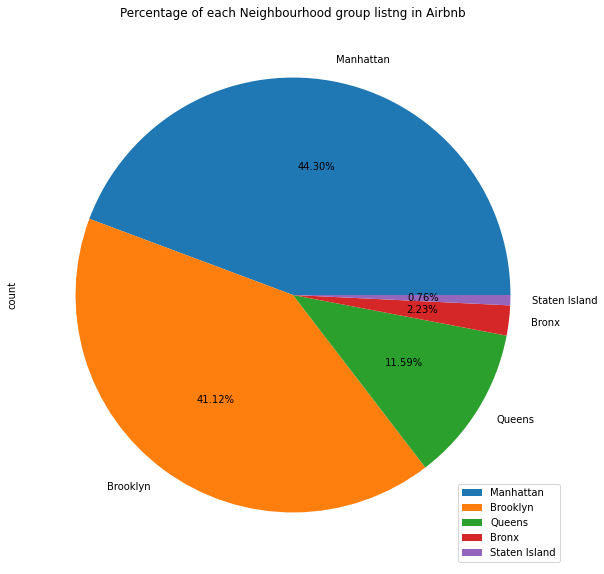

In [15]:
#Pie chart representing count of each neighbourhood group
fig = neighbourhood_group_df.plot.pie(y='count',autopct='%.2f%%',title ='Percentage of each Neighbourhood group listng in Airbnb',figsize=(20,10))

From the above chart, we can see that the Manhattan and Brooklyn has most of listings,covering more than 85% of the total listings.

**b. Top listing counts**

We slice the top 10 hosts in terms of listing count.

In [16]:
#Count of Hosts
top_host=airbnb_df.host_id.value_counts().head(10)
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={"index":"host_id","host_id":"hl_count"},inplace=True)
top_host_df

,host_id,hl_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


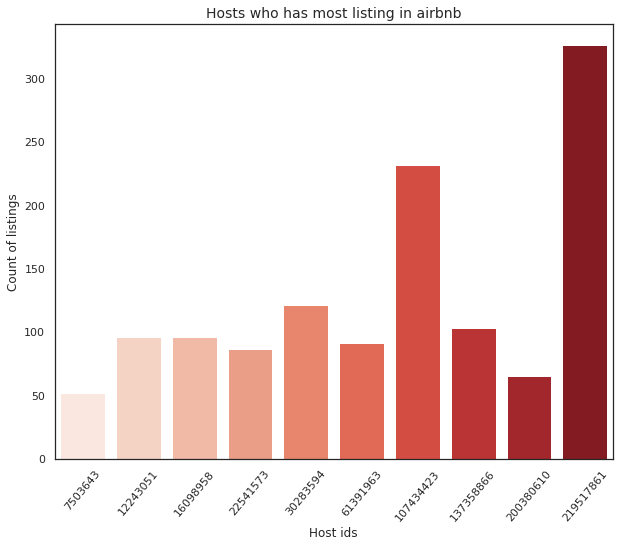

In [22]:
#Host analysis with Barplot
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
fig=sns.barplot(x="host_id",y="hl_count",data=top_host_df,palette='Reds')
fig.set_title('Hosts who has most listing in airbnb',fontsize=14)
fig.set_xlabel('Host ids')
fig.set_ylabel('Count of listings')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 50)
plt.show()

From the above chart, we can see that top 10 hosts has more than 50 listings. One of the hosts has highest listings of 350.

**c. Average Price in each neighbourhood**

In [23]:
#Average price with respect to neighbourhood group
neighbourhood_group_avg_price = airbnb_df.groupby("neighbourhood_group", as_index=False).agg({"price": "mean"})
neighbourhood_group_avg_price.rename(columns={"price":"avg price"},inplace=True)
neighbourhood_group_avg_price

,neighbourhood_group,avg price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


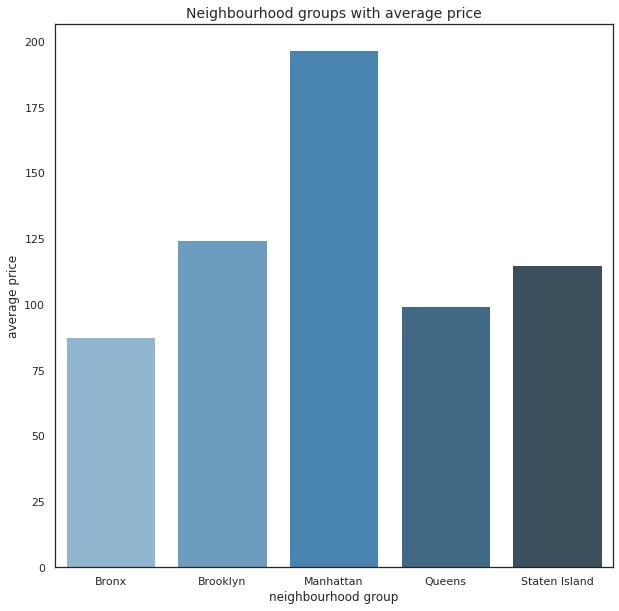

In [25]:
#Price analysis with respect to neighbourhood group with Barplot
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')
fig=sns.barplot(x="neighbourhood_group",y="avg price",data=neighbourhood_group_avg_price,palette='Blues_d')
fig.set_title('Neighbourhood groups with average price',fontsize=14)
fig.set_xlabel('neighbourhood group')
fig.set_ylabel('average price')
plt.show()

From the above chart,we can see that manhattan has highest average price followed by brooklyn compare to all groups.

**d.Price variation for different Room types**

In [26]:
#Average price with respect to room type
room_avg_price = airbnb_df.groupby("room_type", as_index=False).agg({"price": "mean"})
room_avg_price.rename(columns={"price":"avg price"},inplace=True)
room_avg_price

,room_type,avg price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


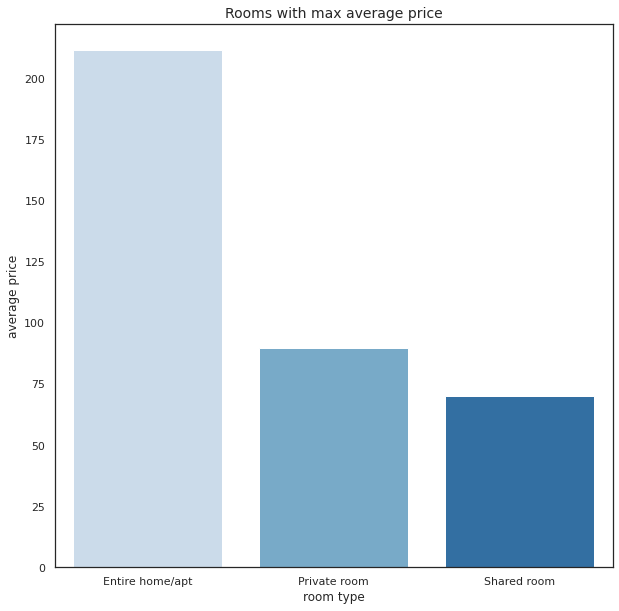

In [28]:
#Price analysis with respect to room type with Barplot
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')
fig=sns.barplot(x="room_type",y="avg price",data=room_avg_price,palette='Blues')
fig.set_title('Rooms with max average price',fontsize=14)
fig.set_xlabel('room type')
fig.set_ylabel('average price')
plt.show()

From the above chart,we can see that Entire home/apt has highest average price followed by Private room compare to all room types.

**e.Price variation for different Room types with respect to neighbourhood group**

In [29]:
#Average price with respect to room type and neighbourhood group
room_type_avgprice = airbnb_df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()
room_type_avgprice.rename(columns={'price':'avg_price'},inplace=True)
room_type_avgprice

,room_type,neighbourhood_group,avg_price
0,Entire home/apt,Bronx,127.506596
1,Entire home/apt,Brooklyn,178.327545
2,Entire home/apt,Manhattan,249.239109
3,Entire home/apt,Queens,147.050573
4,Entire home/apt,Staten Island,173.846591
5,Private room,Bronx,66.788344
6,Private room,Brooklyn,76.500099
7,Private room,Manhattan,116.776622
8,Private room,Queens,71.762456
9,Private room,Staten Island,62.292553


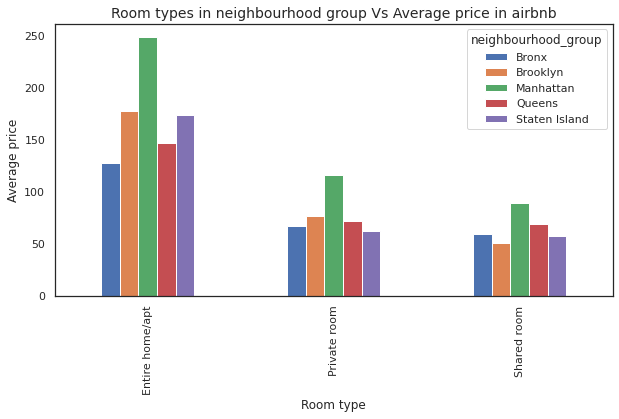

In [31]:
#01 Price analysis with respect to room type and neighbourhood group with Barplot
fig = pd.pivot_table(room_type_avgprice,index='room_type',columns='neighbourhood_group',values='avg_price').plot.bar(figsize=(10,5))
fig.set_title('Room types in neighbourhood group Vs Average price in airbnb',fontsize=14)
fig.set_xlabel('Room type')
fig.set_ylabel('Average price')
plt.show()

Above chart tells that the entire home/apt has highest price in manhattan comapre to other groups and also for all room types manhattan is top for price range.

Below chart is for better analysis and visualizaiton of Price variation for different Room types with respect to neighbourhood group.

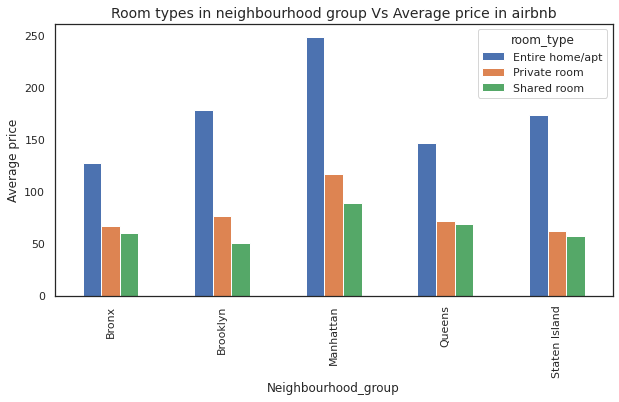

In [33]:
#02 Price analysis with respect to room type and neighbourhood group with Barplot
fig = pd.pivot_table(room_type_avgprice,index='neighbourhood_group',columns='room_type',values='avg_price').plot.bar(figsize=(10,5))
fig.set_title('Room types in neighbourhood group Vs Average price in airbnb',fontsize=14)
fig.set_xlabel('Neighbourhood_group')
fig.set_ylabel('Average price')
plt.show()

From above chart also we can see that the entire home/apt has highest price arround 250 in manhattan comapre to other groups and also in all Neighbourhood group entire home/apt is top for price range.